In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

Wall time: 6.66 s


1 简单示例
========

查询并绘制上证指数最后100个交易日的K线数据

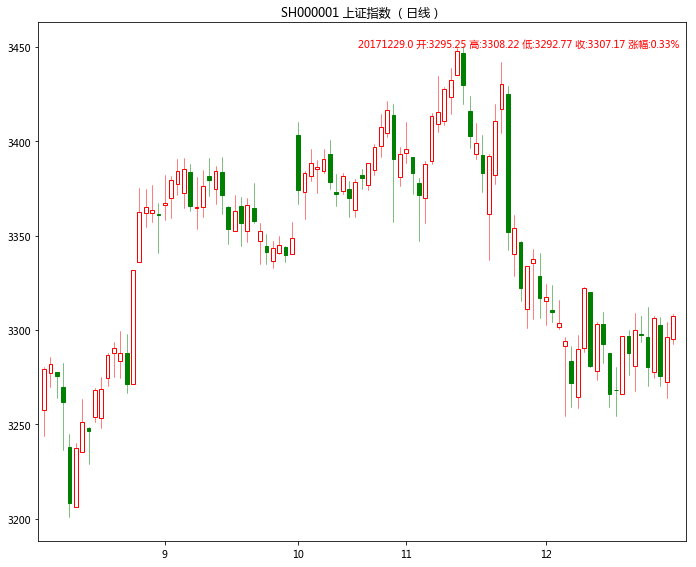

In [2]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
k.plot()

2 查看与遍历K线数据
==========

K线数据可以象list一样遍历和查看具体值

In [3]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
print(k)

KData{
  size : 100
  stock: Stock(SH, 000001, 上证指数, 指数, 1, 1990-12-19 0:0:0, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
 }


In [4]:
#查看最后5个交易日的K线值
k[-5:]

[<KRecord(Datetime(201712250000), 3296.2100, 3312.3000, 3270.4400, 3280.4600, 17729359.0000, 146893635.0000)>,
 <KRecord(Datetime(201712260000), 3277.8400, 3307.3000, 3274.3300, 3306.1200, 17467926.1000, 142434501.0000)>,
 <KRecord(Datetime(201712270000), 3302.4600, 3307.0800, 3270.3500, 3275.7800, 19826466.8000, 162674890.0000)>,
 <KRecord(Datetime(201712280000), 3272.2900, 3304.1000, 3263.7300, 3296.3800, 20801986.5000, 175371670.0000)>,
 <KRecord(Datetime(201712290000), 3295.2500, 3308.2200, 3292.7700, 3307.1700, 17035675.2000, 141586836.0000)>]

In [5]:
#遍历查询最大收盘价
max_close = 0
for v in k:
    if v.closePrice > max_close:
        max_close = v.closePrice
print(max_close)

3447.84


K线数据（KData）其实是有KRecord组成的数组，KRecord的属性如下：

In [6]:
print("日期 - ", k[0].datetime)
print("开盘价 - ", k[0].openPrice)
print("最高价 - ", k[0].highPrice)
print("最低价 - ", k[0].lowPrice)
print("收盘价 - ", k[0].closePrice)
print("成交金额 - ", k[0].transAmount)
print("成交量 - ", k[0].transCount)

日期 -  2017-8-7 0:0:0
开盘价 -  3257.67
最高价 -  3280.1
最低价 -  3243.7200000000003
收盘价 -  3279.46
成交金额 -  23187437.900000002
成交量 -  231173379.0


3 Query详解
========

获取Stock的K线数据，需要指定查询条件，可按索引和日期两种方式查询。

构建按索引方式查询条件：Query(start=0, end=None , kType=Query.DAY, recoverType=Query.NO_RECOVER)

构建按日期方式查询条件：QueryByDate(start=None, end=None, kType=Query.DAY, recoverType=Query.NO_RECOVER)

其中，索引遵循Python的惯用方式，即以0位起始，以[start, end)的方式查询，支持负数表示倒叙; 按日期查询同样遵循[start, end)惯例。

kType: 为K线数据类型（日线、分钟线、周线等）:

    - Query.DAY      日线
    - Query.WEEK     周线
    - Query.MONTH    月线
    - Query.QUARTER  季线
    - Query.HALFYEAR 半年线
    - Query.YEAR     年线
    - Query.MIN      1分钟线
    - Query.MIN5     5分钟线
    - Query.MIN15    15分钟线
    - Query.MIN30    30分钟线
    - Query.MIN60    60分钟线
    
recoverType：为复权类型（不复权、前向复权、后向复权、等比前向复权、等比后向复权），仅支持日线复权：

    - Query.NO_RECOVER     不复权
    - Query.FORWARD        前向复权
    - Query.BACKWARD       后向复权
    - Query.EQUAL_FORWARD  等比前向复权
    - Query.EQUAL_BACKWARD 等比后向复权

3.1 按索引方式查询K线数据
-------------------------

In [7]:
#查询股票前100个交易日的K线数据
k = s.getKData(Query(0, 100))

#查询股票最后100个交易日K线数据
k = s.getKData(Query(-100))

#查询股票第199个交易日到第209个交易日的K线数据
k = s.getKData(Query(200, 210))

#查询股票倒数第100个交易日至倒数第10个交易日的K线数据
k = s.getKData(Query(-100, -10))

3.2 按日期方式查询K线数据
--------------------------

按日期查询同样遵循 [start, end) 惯例。

日期类型为Hikyuu库中定义的 Datetime，其记录的是“年月日时分”。可使用Python的datetime类型、日期字符串或数字表示法进行构建:

- Datetime(datetime.date(2017,1,1))  - 从Python的datetime构建
- Datetime('2017-1-1 9:35') - 通过日期字符串构建
- Datetime(201701010935) - 通过数字进行构建，数字格式须如“yyyymmddhhmm”（4位年份2位月份2位小时数2位分钟数）

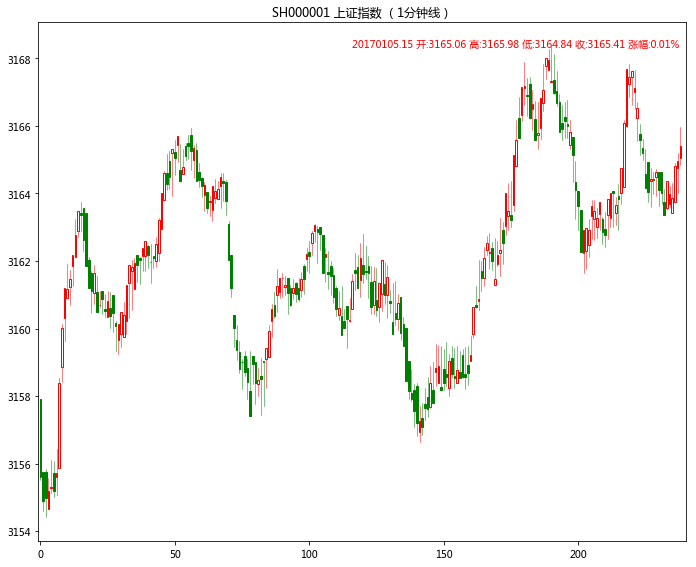

In [8]:
#查询2017年1月1日至今的日线数据
k = s.getKData(QueryByDate(Datetime(201701010000)))

#查询2017年1月1日至3月31日日线数据
k = s.getKData(QueryByDate(Datetime(201701010000), Datetime(201704010000)))

#查询2017年1月5日1分钟线数据
k = s.getKData(QueryByDate(Datetime(201701050000), Datetime(201701060000), kType=Query.MIN))
k.plot()

3.3 查询复权日线
----------------

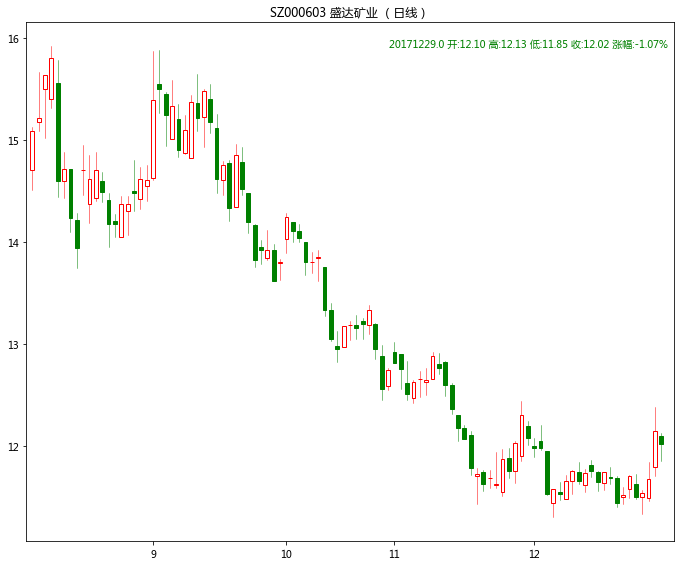

In [9]:
s = sm['sz000603']

#查询股票最后100个交易日K线数据，不复权
k = s.getKData(Query(-100))
k.plot()

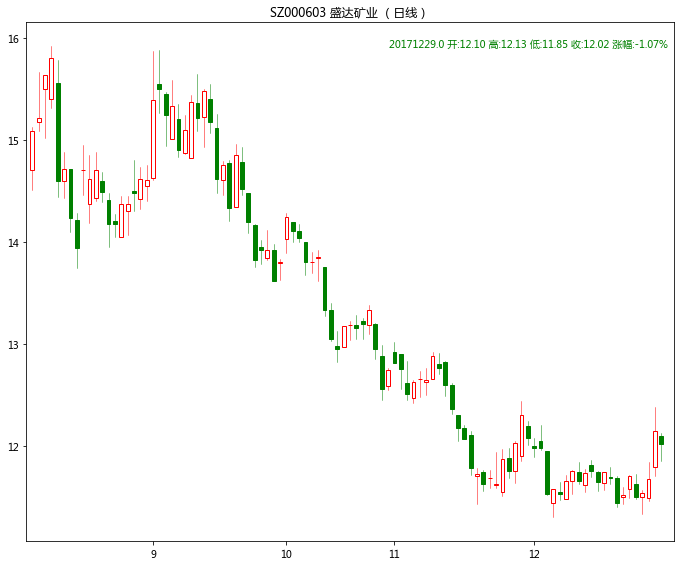

In [10]:
#查询股票最后100个交易日K线数据，后向复权
k = s.getKData(Query(-100, recoverType=Query.BACKWARD))
k.plot()